# Лабораторная работа 5.

## Метод сеток решения волнового уравнения.

Смешанная задача для волнового уравнения имеет следующий вид:

$$\begin{cases} 
   \frac {d^2u}{dt^2} - \frac {d^2u}{dx^2} = f(x, t), 0 < t \leq T, 0 < x < 1\\
   u(x, 0) = p(x), \frac {du}{dt}(x, 0) = q(x), 0 \leq x \leq 1\\
   u(0, t) = 0, u(1, t) = 0, 0 \leq t \leq T
\end{cases}$$  

Соответственно, можно получить разностное уравнение, выразив вторые производные по t и по x через конечные разности:

$\frac {d^2u}{dt^2} = \frac{y_k^{v+1} - 2y_k^v + y_k^{v-1}}{\tau^2}$

$ \frac {d^2u}{dx^2} = \frac{y_{k-1}^{v} - 2y_k^v + y_{k+1}^{v}}{h^2}$

### Задача 1.
**Рассчитать колебания u(x,t).**

* $\rho$ - плотность материала стержня, E - модуль упругости.

$$
   \frac{d^2u}{dt^2} - \frac {E} {\rho} \cdot \frac {d^2u}{dx^2} = 0,  0 < x <  L\\
$$  

#### Ход решения уравнения:

1. Первый слой: $u_j^0 = p(x_j)$

2. Второй слой  $u_j^0 + \tau \cdot \dfrac{du}{dt}_j^0 + \dfrac {\tau^2}{2} \cdot \dfrac {d^2u}{dt^2}_j^0$ $ => u_j^1 = \rho_j + \tau \cdot q(x_j) +\dfrac {\tau^2}{2} \cdot  q(x_j)^n $ - аппроксимация многочлена Тейлора

3. Последующие слои: $u_j^{i+1} = -u_j^{i-1} + \frac {E \cdot \tau^2}{\rho \cdot h^2} \cdot (u_{j+1}^i + u_{j-1}^i) + u_j^i \cdot (2 - 2 \cdot \frac {E \cdot \tau^2}{\rho \cdot h^2})$

**Точность полученного решения:  $O(h^2 + \tau^2)$.**
    
**Условие устойчивости: $\dfrac {\tau}{h} \cdot \sqrt{\frac {E}{\rho}} \leq 1 $**


#### Исходные данные:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 10
delta_u = 0.1
E = 110e8
rho = 4.3
n_x = 50
h = L / n_x
tau = h / np.sqrt(E/rho)
T = 1
n_t = int(T / tau)


f = lambda x: 0
p = lambda x: (-0.004 * x + 0.04) * x  # u(x,0) 
q = lambda x: 0  # u'(x,0)

#### Функция для решения задачи 

In [2]:
def solve():
    def show(local_matrix, x):
        local_matrix = local_matrix[:][::int(len(local_matrix) ** 0.5)]
        y_lines = [local_matrix[:][item] for item in range(local_matrix.shape[1])]
        for y_x in y_lines:
            plt.plot(x, y_x)
        plt.show()

    matrix = np.zeros((n_t, n_x))
    x_s = np.linspace(0, L, n_x)
    matrix[:][0] = 0
    matrix[:][-1] = 0
    matrix[0][1:-1] = p(x_s[1:-1])
    matrix[1][1:-1] = p(x_s[1:-1]) + (tau * q(x_s[1:-1]) + tau ** 2) / 2 * (f(x_s[1:-1]) + p(x_s[2:]) -
                                                                            2 * p(x_s[1:-1]) + p(x_s[:-2]))
    a = E / rho * tau ** 2 / h ** 2
    for i in range(2, n_t):
        matrix[i][1:-1] = -matrix[i-2][1:-1] + a * (matrix[i-1][2:] + matrix[i-1][:-2]) +\
                          matrix[i-1][1:-1] * (2 - 2 * a)

    show(matrix, x_s)
    return matrix, x_s

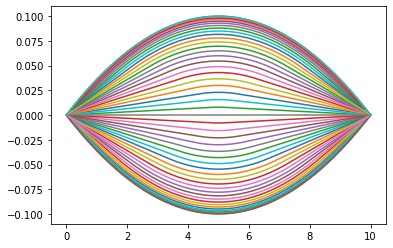

In [3]:
U, X = solve()

### Задача 2.
**Рассчитать колебания тонкой пластины.**

* x, y - координаты, t - время, u(x, y, t) - деформация пластины.

$$\begin{cases} 
   \frac {d^2u}{dt^2} - (\frac {d^2u} {dx^2} + \frac {d^2u}{dy^2}) = 0,  0 < x <  L\\
   u(x, 0) = p(x), \frac {du}{dt})(x, 0) = q(x), 0 \leq x \leq 1\\
   u(0, t) = 0, u(L, t) = 0, 0 \leq t \leq T
\end{cases}$$  


**Производные через конечные разности:**

$\frac {d^2u}{dt^2} = \frac {u_{j, i}^{k+1} - 2 \cdot u_{j, i}^k + u_{j, i}^{k-1}}{\tau^2}$

$\frac {d^2u}{dx^2} = \frac {u_{i+1, j}^{k} - 2 \cdot u_{i, j}^k + u_{i-1, j}^k}{h^2}$

$\frac {d^2u}{dy^2} = \frac {u_{i, j+1}^{k} - 2 \cdot u_{i, j}^k + u_{i, j-1}^k}{h_y^2}$.  

**Формула для вычисления относительно $u_{i,j}^{k+1}$:**

$u_{j, i}^{k+1} = 2 \cdot u_{j, i}^{k} \cdot (1 - \frac{\tau^2}{h^2} - \frac{\tau^2}{h_y^2}) + (u_{j+1,i}^{k} + u_{j-1,i}^{k}) \cdot \frac{\tau^2}{h_y^2} + (u_{j,i+1}^{k} + u_{j, i-1}^{k}) \cdot \frac{\tau^2}{h^2} - u_{j, i}^{k-1}$  


**Условие устойчивости: $\tau \leq \frac{h \cdot h_y}{\sqrt{h^2 + h_y^2}}.$**

**Точность полученного решения:  $O(h^2 + \tau^2 + h_y^2)$.**


**Аппроксимация граничных условий:**

$\frac {\partial u}{\partial n} = 0$, учитывая заданные границы, выражаем производные через левые конечные разности и получаем: 
$=> u_{0, j}^k = u_{1, j}^k, u_{N_y, j}^k = u_{N_y-1, j}^k$ 

Второй временной слой аппроксимируется многочленом Тейлора:  

$u^1 = u^0 + \tau \cdot \frac {du}{dt} + \frac {\tau^2}{2} \cdot \dfrac {d^2u_{i,j}^0}{dt^2} = p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2} \cdot \dfrac {d^2u_{i,j}^0}{dt^2} = p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2} \cdot (\frac {d^2u}{dx^2} + \frac {d^2u}{dy^2}) =  p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2}\cdot (\dfrac{p_{i+1,j} - 2\cdot p_{i,j} + p_{i-1,j}}{h^2} + \dfrac{p_{i,j+1} - 2\cdot p_{i,j} + p_{i,j-1}}{h_y^2})$


#### Исходные данные:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = 1
b = 2
T = 10
n_x = 50
h = a / n_x
n_y = 50
h_y = b / n_y
tau = h * h_y / np.sqrt(h ** 2 + h_y ** 2)
n_t = int(T / tau)

u = lambda x, y, t=0: np.arctan(np.cos(np.pi * x / a))
du_dt = lambda x, y, t=0: np.sin(2 * np.pi * x / a) * np.sin(np.pi * y / b)

#### Функция для решения задачи 

In [5]:
def membrane_solve():
    matrix = np.zeros((n_t, n_x, n_y))
    x_s = np.linspace(-a / 2, a / 2, n_x)
    y_s = np.linspace(-b / 2, b / 2, n_y)
    u_s = np.zeros((len(x_s), len(y_s)))
    du_dt_s = np.zeros((len(x_s), len(y_s)))

    for i in range(len(x_s)):
        for j in range(len(y_s)):
            u_s[i][j] = u(x_s[i], y_s[j])
            du_dt_s[i][j] = du_dt(x_s[i], y_s[j])

    matrix[0][1:-1] = u_s[1:-1]

    for i in range(1, n_x - 1):
        for j in range(1, n_y - 1):
            matrix[1][i][j] = u_s[i][j] + tau * du_dt_s[i][j] + tau ** 2 / 2 * (
                        (u_s[i+1][j] - 2 * u_s[i][j] + u_s[i-1][j]) / h ** 2 + (
                            u_s[i][j+1] - 2 * u_s[i][j] + u_s[i][j - 1]) / h_y ** 2)
        matrix[1][i][0] = matrix[1][i][1]
        matrix[1][i][-1] = matrix[1][i][-2]

    for k in range(2, n_t):
        for i in range(1, n_x - 1):
            for j in range(1, n_y - 1):
                matrix[k][i][j] = 2 * matrix[k - 1][i][j] * (1 - (tau / h) ** 2 - (tau / h_y) ** 2) + (
                        matrix[k - 1][i][j + 1] + matrix[k - 1][i][j - 1]) * (tau / h_y) ** 2 + (tau / h) ** 2 * (
                                     matrix[k - 1][i + 1][j] + matrix[k - 1][i - 1][j]) - matrix[k - 2][i][j]
            matrix[k][i][0] = matrix[k][i][1]
            matrix[k][i][-1] = matrix[k][i][-2]

    def _slice(local_matrix, step, pos, x_or_y, flag="x"):
        if flag == "x":
            for i, s in enumerate(local_matrix[::step, pos, :]):
                plt.plot(x_or_y, s)
        else:
            for i, s in enumerate(local_matrix[::step, :, pos]):
                plt.plot(x_or_y, s)
        plt.show()

    _slice(local_matrix=matrix, step=20, pos=2, x_or_y=y_s, flag="y")
    _slice(local_matrix=matrix, step=20, pos=2, x_or_y=x_s, flag="x")

    return matrix, x_s, y_s

In [ ]:
matrix, x_s, y_s = membrane_solve()

In [ ]:
for i in range(0, 200, 20):
    sns.heatmap(matrix[i].T, cmap='Reds', vmin=matrix.min(), vmax=matrix.max())
    plt.show()
